In [31]:
from scipy.stats import ttest_ind
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from scipy import signal

In [3]:
pickles_address = '/content/drive/MyDrive/Brain-Computer Interfaces/Epilepsy Dataset/Pickles/'
A_address = '/content/drive/MyDrive/Brain-Computer Interfaces/Epilepsy Dataset/Z/'
B_address = '/content/drive/MyDrive/Brain-Computer Interfaces/Epilepsy Dataset/O/'
C_address = '/content/drive/MyDrive/Brain-Computer Interfaces/Epilepsy Dataset/N/'
D_address = '/content/drive/MyDrive/Brain-Computer Interfaces/Epilepsy Dataset/F/'
E_address = '/content/drive/MyDrive/Brain-Computer Interfaces/Epilepsy Dataset/S/'

In [5]:
with open(pickles_address + 'As_allfeatures.pickle', 'rb') as f:
    As_features = pickle.load(f)
with open(pickles_address + 'Bs_allfeatures.pickle', 'rb') as f:
    Bs_features = pickle.load(f)
with open(pickles_address + 'Cs_allfeatures.pickle', 'rb') as f:
    Cs_features = pickle.load(f)
with open(pickles_address + 'Ds_allfeatures.pickle', 'rb') as f:
    Ds_features = pickle.load(f)
with open(pickles_address + 'Es_allfeatures.pickle', 'rb') as f:
    Es_features = pickle.load(f)
print('As_features', As_features.shape)
print('Bs_features', Bs_features.shape)
print('Cs_features', Cs_features.shape)
print('Ds_features', Ds_features.shape)
print('Es_features', Es_features.shape)

As_features (95, 100)
Bs_features (95, 100)
Cs_features (95, 100)
Ds_features (95, 100)
Es_features (95, 100)


In [25]:
Ts, Ps = [], []
for i in range(As_features.shape[0]):
    Xa = As_features[i, :]
    Xc = Cs_features[i, :]
    t, p = ttest_ind(Xa, Xc)
    Ts.append(t)
    Ps.append(p)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4999: RuntimeWarning: invalid value encountered in double_scalars
  d = mean1 - mean2


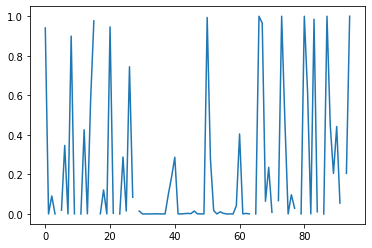

In [26]:
plt.plot(Ps)
plt.show()

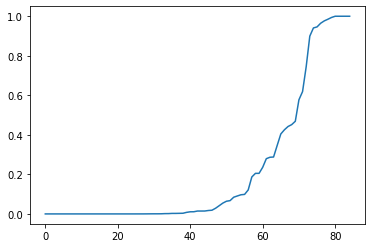

In [27]:
Ps_sorted = sorted([[i, Ps[i]] for i in range(len(Ps)) if str(Ps[i]) != 'nan'], key = lambda x: x[1])
plt.plot([each[1] for each in Ps_sorted])
plt.show()

In [29]:
final_features_size = 40
As_selected_features, Cs_selected_features = [], []

for i in range(final_features_size):
    As_selected_features.append(As_features[Ps_sorted[i][0]])
    Cs_selected_features.append(Cs_features[Ps_sorted[i][0]])

As_selected_features = np.array(As_selected_features)
Cs_selected_features = np.array(Cs_selected_features)
print(As_selected_features.shape, Cs_selected_features.shape)

(40, 100) (40, 100)


In [33]:
def normalize_signals(inp):
    normalized_list = []
    for i in range(inp.shape[1]):
        sig = inp[:, i]
        for i in range(len(sig)):
            if str(sig[i]) == 'inf' or str(sig[i]) == '-inf':
                sig[i] = 0
        m = np.mean(sig)
        std = np.std(sig)
        normalized_list.append((sig - m) / std)
    return np.array(normalized_list)

tp_a = normalize_signals(As_selected_features)
tp_c = normalize_signals(Cs_selected_features)

In [34]:
np.mean(tp_a[0]), np.std(tp_a[0])

(6.661338147750939e-17, 1.0000000000000002)

In [36]:
X = list(tp_a.T) + list(tp_c.T)
y = [0] * len(tp_a.T) + [1] * len(tp_c.T)
len(X), len(y)

(80, 80)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)
len(X_train), len(y_train), len(X_test), len(y_test)

(64, 64, 16, 16)

In [38]:
print(X_train[0])

[-0.36113819 -0.38174625 -0.34255464 -0.36929934 -0.34971945 -0.31406703
 -0.33020187 -0.32909333 -0.31988354 -0.33270296 -0.32285312 -0.34653583
 -0.39059276 -0.31296142 -0.3391991  -0.35973723 -0.39192148 -0.35508963
 -0.32650752 -0.30622342 -0.36009838 -0.29254041 -0.36276257 -0.35912373
 -0.3608747  -0.36893828 -0.37229216 -0.30238609 -0.30389353 -0.31555086
 -0.33498936 -0.28987914 -0.39622285 -0.35048663 -0.31257164 -0.35262284
 -0.33278416 -0.30847299 -0.315327   -0.31176105 -0.32086575 -0.37664272
 -0.30853429 -0.34431159 -0.29937765 -0.35067951 -0.3353136  -0.34478669
 -0.27538961 -0.29650393 -0.39346075 -0.30339126 -0.34276708 -0.32682062
 -0.32072521 -0.33647298 -0.32385497 -0.26857732 -0.31308997 -0.32635785
 -0.30673345 -0.34823402 -0.29593026 -0.26711957 -0.30515546 -0.31727486
 -0.28929939 -0.27852994 -0.27704634 -0.29485601 -0.30519459 -0.27708868
 -0.31212173 -0.338792   -0.36689883 -0.3341737  -0.34171254 -0.35408377
 -0.31906457 -0.28915222 -0.25749922 -0.30081923 -0

In [39]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
y_pred = knn.predict(X_test)

In [41]:
confusion_matrix(y_test, y_pred)

array([[6, 0],
       [1, 9]])

In [42]:
correctness = [1 if y_test[i] == y_pred[i] else 0 for i in range(len(y_pred))]
print('Accuracy:', (sum(correctness) / len(correctness)) * 100)

Accuracy: 93.75


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.90      0.95        10

    accuracy                           0.94        16
   macro avg       0.93      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16

